# Принятие решений в бизнесе на основе данных

Подготовлен список гипотез для увеличения выручки. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

## План исследования: <a id="step0"></a>
[**Шаг 1. Загрузка файлов с данными и изучение информации**](#step1)\
[**Шаг 2. Подготовка данных**](#step2)\
[**Шаг 3. Приоритизация гипотез**](#step3)\
[**Шаг 4. Анализ A/B-теста. Выводы**](#step4)




### Исследование:
### Шаг 1. Загрузка файлов с данными и изучение информации <a id="step1"></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy import stats as st
import math as mth
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 105 #для отображения полного текста гипотез в колонке
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
#загружаем данные:
hypothesis = pd.read_csv('/Users/maxim/Documents/Edu/DA/Yandex/Projects/Datasets/08/hypothesis.csv')
orders = pd.read_csv('/Users/maxim/Documents/Edu/DA/Yandex/Projects/Datasets/08/orders.csv')
visitors = pd.read_csv('/Users/maxim/Documents/Edu/DA/Yandex/Projects/Datasets/08/visitors.csv')

#### Описание данных:
Файл **hypothesis.csv** содержит 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл **orders.csv** содержит данные с результатами A/B теста:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл **visitors.csv** содержит данные с результатами A/B теста:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [3]:
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
print(orders.duplicated().sum(), visitors.duplicated().sum()) #проверяем наличие дубликатов

0 0


#### Вывод:
Данные достаточно хорошего качества, приведем данные с временем к соответствующему типу и переименуем столбцы для удобства и большей информативности.

### Шаг 2. Подготовка данных <a id="step2"></a>
[*Наверх к плану*](#step0)

In [10]:
orders['date'] = pd.to_datetime(orders['date'])     #приведение данных в временному типу
visitors['date'] = pd.to_datetime(visitors['date'])

In [11]:
orders.info() #проверяем

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [13]:
orders = orders.rename(columns={'transactionId': 'order_id', 'visitorId': 'uid'})
visitors = visitors.rename(columns={'visitors': 'n_visitors'})
print(orders.columns.to_list()) #проверяем
print(visitors.columns.to_list())

['order_id', 'uid', 'date', 'revenue', 'group']
['date', 'group', 'n_visitors']


### Шаг 3. Приоритизация гипотез <a id="step3"></a>
[*Наверх к плану*](#step0)

Подсчитаем фреймворк ICE для приоритизации гипотез. Отсортируем по убыванию приоритета.

In [14]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(1)
hypothesis = hypothesis.sort_values('ICE', ascending=False)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек...",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


По аналогии добавим фреймворк RICE для приоритизации гипотез. Отсортируем по убыванию приоритета.

In [15]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(1)
hypothesis = hypothesis.sort_values('RICE', ascending=False)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек...",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


#### Интерпретация результата: 
Первая пятерка гипотез одинакова по составу для обеих метрик. Фреймворк RICE в данном случае меняет приоритет гипотез. Гипотеза №7 была на 3 месте, но благодаря учету охвата пользователей перемещается на 1 место с большим отрывом значения приоритета от остальных гипотез. Гипотеза №2 перемещается с 5 на 2 место. Разница в приоритизации гипотез при применении RICE вместо ICE обусловлена тем, что ICE не учитывает потенциальный охват пользователей, которых затронет изменения.

### Шаг 4. Анализ A/B-теста <a id="step4"></a>
[*Наверх к плану*](#step0)

Для построения графиков соберем и подготовим необходимые данные.
Для начала создадим массив уникальных пар значений дат и групп теста, получим строки таблицы orders, дата которых меньше или равна дате элемента из dates_groups, а группа теста равна группе из dates_groups. Агрегируем значения, вычислим максимальную дату. Для группы тоже рассчитаем максимум, и хотя она будет определённой, сделаем это, чтобы столбец 'group' не пропал из итогового вывода. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков:

In [16]:
orders.head()

,order_id,uid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [17]:
dates_groups = orders[['date','group']].drop_duplicates()

orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
    .agg(
        {'date': 'max', 
         'group': 'max', 
         'order_id': pd.Series.nunique, 
         'uid' : pd.Series.nunique, 
         'revenue' : 'sum'}), axis=1)\
    .sort_values(by=['date','group'])     #сортируем по двум столбцам
orders_aggregated.head()

,date,group,order_id,uid,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [18]:
#аналогично получаем агрегированные кумулятивные по дням данные о посетителях
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
    .agg(
        {'date': 'max',
         'group': 'max',
         'n_visitors': 'sum'}), axis=1)\
    .sort_values(by=['date','group'])
visitors_aggregated.head()

,date,group,n_visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [19]:
orders_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 55 to 930
Data columns (total 5 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
order_id    62 non-null int64
uid         62 non-null int64
revenue     62 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.9+ KB


In [20]:
visitors_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 55 to 930
Data columns (total 3 columns):
date          62 non-null datetime64[ns]
group         62 non-null object
n_visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.9+ KB


Количество строк совпадает, всё в порядке. Объединим кумулятивные данные в одну таблицу по двум полям:

In [21]:
cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date', 'group'])
cumulative_data = cumulative_data.rename(columns={'order_id': 'n_orders', 'uid': 'n_uid'})
cumulative_data.head(10)

,date,group,n_orders,n_uid,revenue,n_visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803
6,2019-08-04,A,84,77,425699,2562
7,2019-08-04,B,78,75,489567,2573
8,2019-08-05,A,109,100,549917,3318
9,2019-08-05,B,101,98,581995,3280


In [22]:
cumulative_data.info()   #убедимся в корректности объединения

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 6 columns):
date          62 non-null datetime64[ns]
group         62 non-null object
n_orders      62 non-null int64
n_uid         62 non-null int64
revenue       62 non-null int64
n_visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.4+ KB


Получили общую таблицу с нужными данными, теперь можно переходить к построению графиков.

#### 1. График кумулятивной выручки по группам

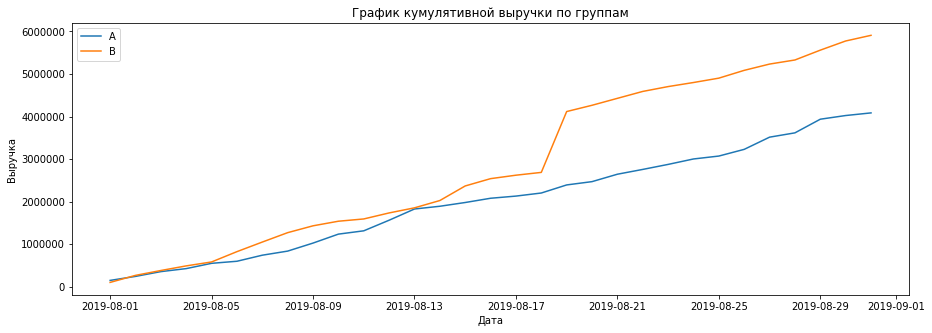

In [23]:
cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date', 'revenue', 'n_orders']] #разделяем на группы
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date', 'revenue', 'n_orders']]
plt.figure(figsize=(15, 5))
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')
plt.legend();

**Выводы и предположения**: Выручка почти равномерно увеличивается в течение всего теста. Заметен резкий скачок выручки в группе B, который может быть вызван заказами на крупную сумму, или просто увеличением количества заказов, то есть являться выбросами. Выручка по заказам у группы B стабильно выше, чем у группы A.


#### 2. График кумулятивного среднего чека по группам

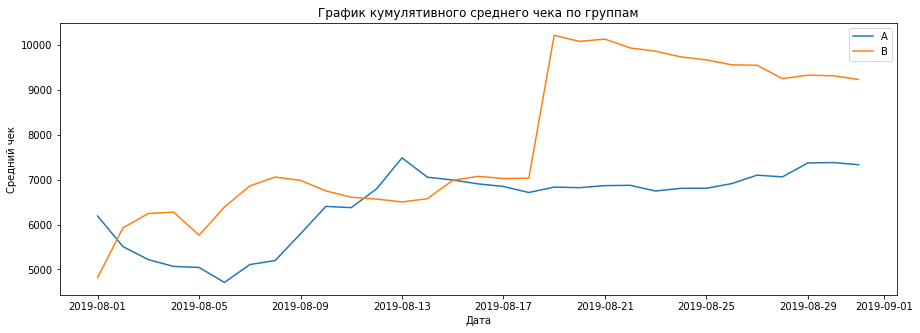

In [24]:
plt.figure(figsize=(15, 5))
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['n_orders'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['n_orders'], label='B')
plt.legend();

**Выводы и предположения**: графики среднего чека показывают неравномерное распределение выручки по всему периоду теста. В группе В заметен резкий скачок с дальнейшим плавным снижением к предыдущим значениям. Оба графика стабилизируются к концу теста. Значения в группе В остаются лучше показателей группы А.

#### 3. График относительного изменения кумулятивного среднего чека группы B к группе A

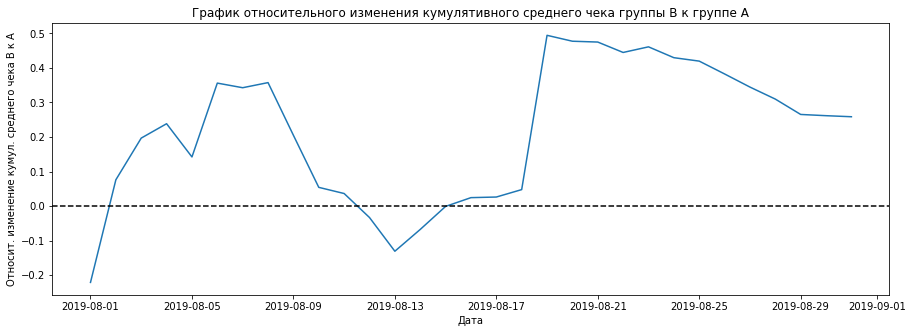

In [25]:
#собираем данные в один датафрейм
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, on='date', how='left', suffixes=['A', 'B'])

#отображаем отножение средних чеков
plt.figure(figsize=(15, 5))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относит. изменение кумул. среднего чека B к A')
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['n_ordersB'])/
(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['n_ordersA'])-1)

#добавляем ось X для ориентира
plt.axhline(y=0, color='black', linestyle='--');

**Выводы и предположения**: График резко меняет направление на нескольких отрезках, что говорит о явном наличии выбросов. В целом, данные группы B лучше группы А, но во второй трети временного промежутка теста график группы В имеет тенденцию к ухудшению показателей.

#### 4. График кумулятивной конверсии по группам

In [26]:
cumulative_data.head()

,date,group,n_orders,n_uid,revenue,n_visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


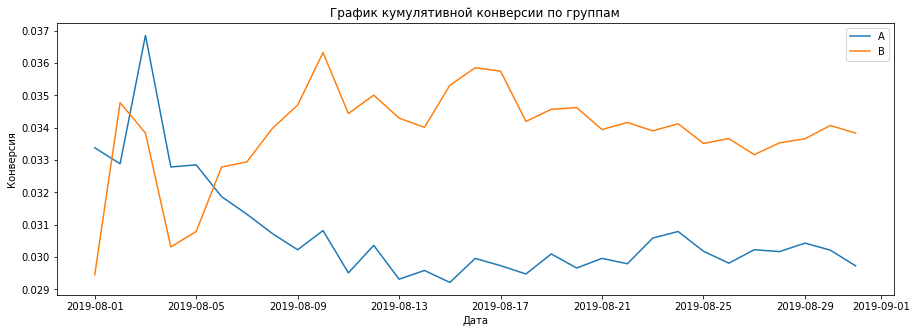

In [27]:
cumulative_data['conversion'] = cumulative_data['n_orders'] / cumulative_data['n_visitors']  #кумулятивная конверсия
cumulative_data_A = cumulative_data[cumulative_data['group']=='A']                        #выделяем данные группы А
cumulative_data_B = cumulative_data[cumulative_data['group']=='B']                        #выделяем данные группы B

#строим графики
plt.figure(figsize=(15, 5))
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')
plt.legend();

In [28]:
print('Средняя конверсия группы A: {:.2%}'.format(cumulative_data_A['conversion'].mean()))
print('Средняя конверсия группы B: {:.2%}'.format(cumulative_data_B['conversion'].mean()))

Средняя конверсия группы A: 3.07%
Средняя конверсия группы B: 3.39%


**Выводы и предположения**: После первой четверти теста графики конверсий двух групп относительно стабилизируются, незначительно колеблясь на протяжении дальнейшего времени теста. Кумулятивная конверсия группы В остается выше конверсии группы А. 

#### 5. График относительного изменения кумулятивной конверсии группы B к группе A

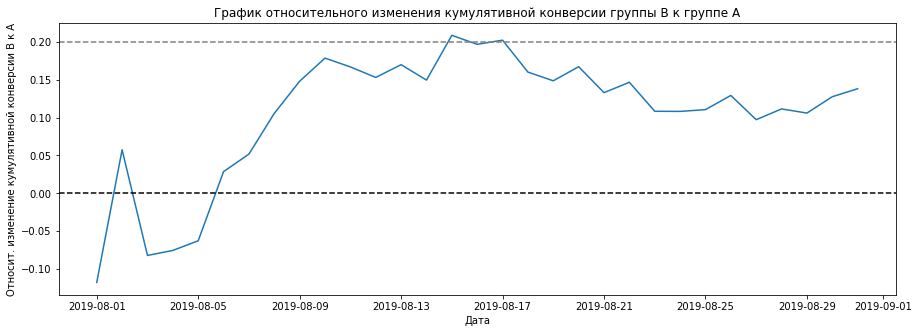

In [29]:
#собираем данные в один датафрейм
merged_cumulative_conversions = cumulative_data_A[['date', 'conversion']]\
    .merge(cumulative_data_B[['date', 'conversion']], on='date', how='left', suffixes=['A', 'B'])

#строим графики
plt.figure(figsize=(15, 5))
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относит. изменение кумулятивной конверсии B к A')
plt.plot(merged_cumulative_conversions['date'],\
        merged_cumulative_conversions['conversionB'] / merged_cumulative_conversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--');

**Выводы и предположения**: В первые 5 дней кумулятивная конверсия группы В в основном проигрывала группе А. Но далее до конца месяца конверсия группы В была в среднем на 0.1-0.2 пункта выше.

#### 6. Точечный график количества заказов по пользователям.

In [30]:
orders.head()

,order_id,uid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [31]:
orders_per_user = (
                    orders.groupby('uid', as_index=False)      #группируем данные по уникам
                    .agg({'order_id': 'nunique'})              #считаем количество заказов
                    .rename(columns={'order_id': 'n_orders'})  #переименовываем столбец
)
orders_per_user.head()

,uid,n_orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


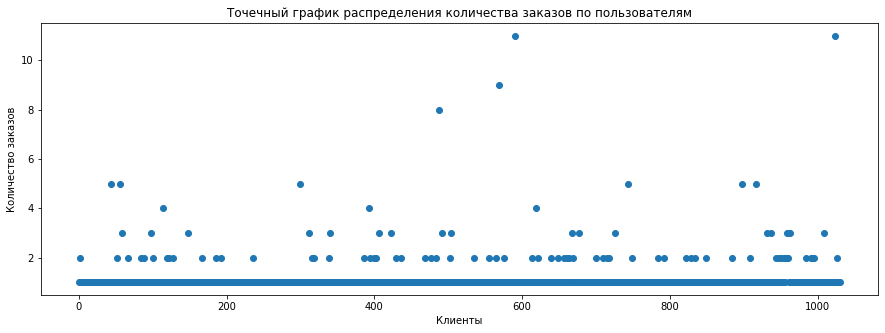

In [32]:
#строим график
plt.figure(figsize=(15, 5))
plt.title('Точечный график распределения количества заказов по пользователям')
plt.xlabel('Клиенты')
plt.ylabel('Количество заказов')
plt.scatter(pd.Series(range(0, len(orders_per_user))), orders_per_user['n_orders']);

**Выводы и предположения**: Достаточно много пользователей с 2-3 заказами. Определиться, считать ли их выбросами, нам поможет определение перцентилей и выбор границ аномальных значений.

#### 7. Подсчет 95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей

In [33]:
np.percentile(orders_per_user['n_orders'], [95, 99])

array([2., 4.])

In [34]:
orders_per_user[orders_per_user['n_orders'] > 2]['uid'].count()

30

В качестве границы выбросов примем 95-й перцентиль, то есть значения больше 2, которые составляют не более 5% от общего количества данных. Очистка данных от выбросов даст нам возможность получить более точные средние данные и графики. В результате этой фильтрации мы отбросим 30 строчек значений.

#### 8. Точечный график стоимостей заказов.

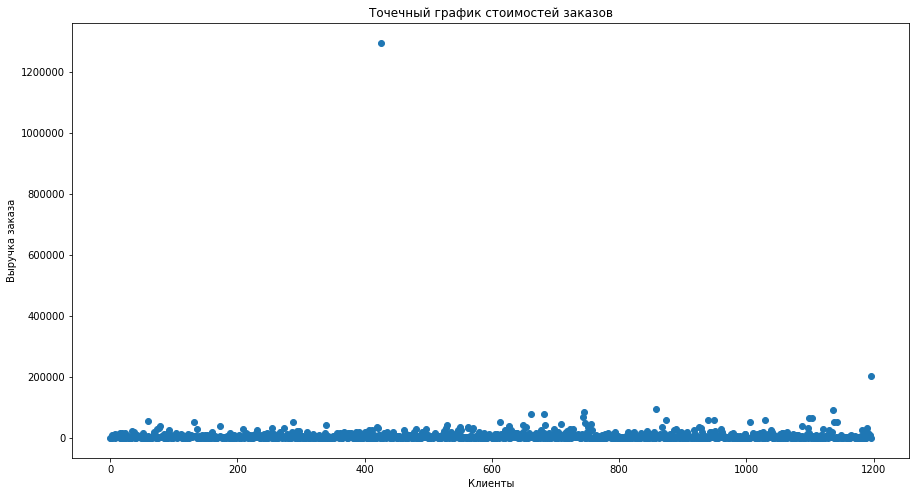

In [35]:
plt.figure(figsize=(15, 8))
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Клиенты')
plt.ylabel('Выручка заказа')
plt.scatter(pd.Series(range(0, len(orders))), orders['revenue']);

На графике четко видны 2 значительных выброса. Попробуем ограничить значения по оси Y, чтобы оценить остальные данные без этих 2 значений:

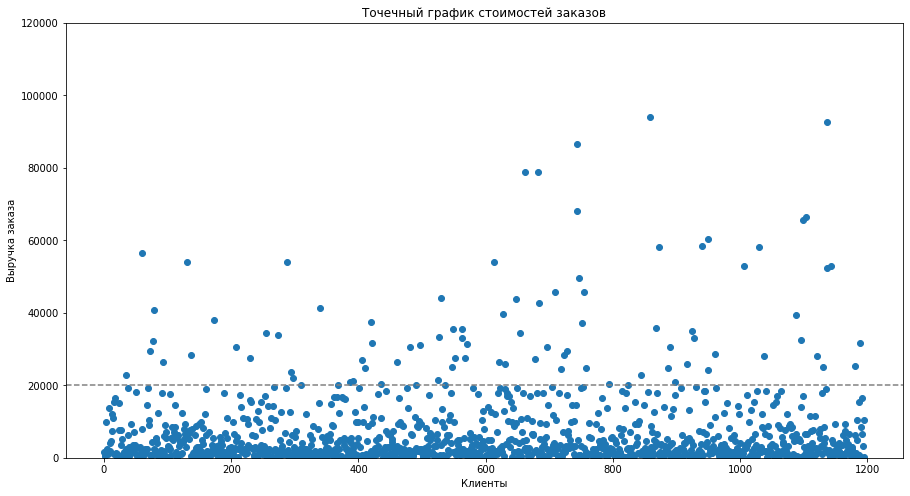

In [36]:
plt.figure(figsize=(15, 8))
plt.ylim(0, 120000)
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Клиенты')
plt.ylabel('Выручка заказа')
plt.scatter(pd.Series(range(0, len(orders))), orders['revenue'])
plt.axhline(y=20000, color='grey', linestyle='--');

**Выводы и предположения**: Данные достаточно плотно сгруппированы между значениями от 0 и до 20000, далее количество наблюдений с более высокими значениями начинает стремительно уменьшаться. Для определения границы выбросов данного набора наблюдений необходимо произвести дополнительные расчеты.

#### 9. Подсчет 95-й и 99-й перцентили стоимости заказов. Выбор границы для определения аномальных заказов

In [37]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

In [38]:
print('Общее количество заказов:', orders['revenue'].count())
print('Медианная стоимость заказа:', orders['revenue'].median())
print('Количество заказов дороже 28000:', orders[orders['revenue'] > 28000]['revenue'].count()) 
print('Количество заказов дороже 58233.2:', orders[orders['revenue'] > 58233.2]['revenue'].count()) 

Общее количество заказов: 1197
Медианная стоимость заказа: 2978.0
Количество заказов дороже 28000: 60
Количество заказов дороже 58233.2: 12


Исходя из медианной стоимости заказа в 2978 и того, что 95-й перцентиль расположился на уровне 28000, можно смело его принять как границу определения выбросов и отбросить строчки с пользователями, совершивших аномальные заказы.

#### 10. Статистическая значимость различий в конверсии между группами по «сырым» данным

В дальнейшем нам предстоит несколько раз проводить статистические тесты по критерию Манна-Уитни. Для удобства напишем функцию со всеми расчетами и выводами по тесту, на вход которой будут подаваться 2 переменные с сохраненными в них набором данных к сравнению:

In [39]:
def mannwitneyu_test(x, y):
    alpha = 0.05
    results = stats.mannwhitneyu(x, y)[1]
    print('p-значение: {0:.4f}'.format(results))
    if (results < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")
    print('Относительный проигрыш значений группы А к B: {0:.1%}'.format(y.mean()/x.mean()-1))

Также, нам понадобятся значения количества посещений по дням. Добавим эти данные из таблицы 'visitors':

In [40]:
data = cumulative_data.merge(visitors, on=['date', 'group'])
data = data.rename(columns={'n_visitors_x': 'n_visitors', 'n_visitors_y': 'n_visitors_daily'})
data.head(10)

,date,group,n_orders,n_uid,revenue,n_visitors,conversion,n_visitors_daily
0,2019-08-01,A,24,20,148579,719,0.033380,719
1,2019-08-01,B,21,20,101217,713,0.029453,713
2,2019-08-02,A,44,38,242401,1338,0.032885,619
3,2019-08-02,B,45,43,266748,1294,0.034776,581
4,2019-08-03,A,68,62,354874,1845,0.036856,507
5,2019-08-03,B,61,59,380996,1803,0.033833,509
6,2019-08-04,A,84,77,425699,2562,0.032787,717
7,2019-08-04,B,78,75,489567,2573,0.030315,770
8,2019-08-05,A,109,100,549917,3318,0.032851,756
9,2019-08-05,B,101,98,581995,3280,0.030793,707


Создадим переменные orders_per_users_A и orders_per_users_B. В них укажем число совершённых заказов.

In [41]:
orders_per_users_A = (
            orders[orders['group']=='A']               #данные группы А
            .groupby('uid', as_index=False)            #группируем данные по уникам
            .agg({'order_id': 'nunique'})              #считаем количество заказов
            .rename(columns={'order_id': 'n_orders'})) #переименовываем столбец

orders_per_users_B = (
            orders[orders['group']=='B']               #данные группы B
            .groupby('uid', as_index=False)            #группируем данные по уникам
            .agg({'order_id': 'nunique'})              #считаем количество заказов
            .rename(columns={'order_id': 'n_orders'})) #переименовываем столбец   

Объявим переменные sample_A и sample_B, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

Число элементов sample_A — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sample_A методом mean(). Аналогично найдём конверсию группы B: sample_B.mean()

In [42]:
sample_A = pd.concat([orders_per_users_A['n_orders'],\
                     pd.Series(0, index=np.arange(data.query('group == "A"')['n_visitors_daily'].sum() - \
                                                  len(orders_per_users_A['n_orders'])), name='orders')],axis=0)

sample_B = pd.concat([orders_per_users_B['n_orders'],\
                     pd.Series(0, index=np.arange(data.query('group == "B"')['n_visitors_daily'].sum() - \
                                                  len(orders_per_users_B['n_orders'])), name='orders')],axis=0)

H0 (нулевая гипотеза): средние значения конверсии между группами А и В **не** различаются;\
H1 (альтернативная гипотеза): средние значения конверсии между группами А и В различаются.

In [43]:
mannwitneyu_test(sample_A, sample_B) #запускаем функцию

p-значение: 0.0084
Отвергаем нулевую гипотезу
Относительный проигрыш значений группы А к B: 13.8%


**Выводы и предположения**: значение p-value меньше 0.05, значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Таким образом, можно с большей долей уверенности утверждать, что по сырым данным есть значимые различия между группами А и В.

#### 11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Передадим критерию Манна Уитни данные о выручке с заказов, а также посчитаем относительные различия в среднем чеке между группами:

In [44]:
revenue_A = orders[orders['group']=='A']['revenue']
revenue_B = orders[orders['group']=='B']['revenue']

H0: значения среднего чека между группами А и В **не** различаются;\
H1: значения среднего чека между группами А и В различаются.

In [45]:
mannwitneyu_test(revenue_A, revenue_B)

p-значение: 0.3646
Не получилось отвергнуть нулевую гипотезу
Относительный проигрыш значений группы А к B: 25.9%


**Выводы и предположения**: Несмотря на то, что расчетная разница достаточно большая (25,9%), она статистически не значима. Это как раз говорит о том, что она скорее всего вызвана аномалиями, а не тенденциями в данных.

#### 12. Статистическая значимость различий в конверсии между группами по «очищенным» данным

В качестве границ выбросов ранее были приняты 95-е перцентили. Для количества заказов - более 2 шт., для выручки - более 28000. Подготовим соответствующие срезы с аномальными значениями:

In [46]:
users_with_many_orders = pd.concat([orders_per_users_A[orders_per_users_A['n_orders'] > 2]['uid'],\
                                    orders_per_users_B[orders_per_users_B['n_orders'] > 2]['uid']], axis=0)
users_with_expensive_orders = orders[orders['revenue'] > 28000]['uid']
abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0).drop_duplicates().sort_values()
abnormal_users.shape  #количество пользователей с аномальными значениями

(74,)

Оценим влияние данных этих пользователей на результаты теста. Подготовим выборки количества заказов по пользователям по группам, а затем проведем тест:

In [47]:
sample_A_filt = pd.concat([orders_per_users_A[np.logical_not(orders_per_users_A['uid'].isin(abnormal_users))]['n_orders'],\
                           pd.Series(0, index=np.arange(data.query('group == "A"')['n_visitors_daily'].sum() - \
                                                        len(orders_per_users_A['n_orders'])), name='orders')],axis=0)

sample_B_filt = pd.concat([orders_per_users_B[np.logical_not(orders_per_users_B['uid'].isin(abnormal_users))]['n_orders'],\
                           pd.Series(0, index=np.arange(data.query('group == "B"')['n_visitors_daily'].sum() - \
                                                        len(orders_per_users_B['n_orders'])), name='orders')],axis=0)

H0: средние значения конверсии по очищенным данным между группами А и В **не** различаются;\
H1: средние значения конверсии по очищенным данным между группами А и В различаются.

In [48]:
mannwitneyu_test(sample_A_filt, sample_B_filt)

p-значение: 0.0065
Отвергаем нулевую гипотезу
Относительный проигрыш значений группы А к B: 17.3%


**Выводы и предположения**: результаты по конверсии не сильно изменились. После удаления выбросов между выборками по прежнему остаются статистически значимые различия.

#### 13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [49]:
revenue_A_filt = orders[np.logical_and(orders['group']=='A', np.logical_not(orders['uid'].isin(abnormal_users)))]['revenue']
revenue_B_filt = orders[np.logical_and(orders['group']=='B', np.logical_not(orders['uid'].isin(abnormal_users)))]['revenue']

H0: значения среднего чека между группами А и В по очищенным данным **не** различаются;\
H1: значения среднего чека между группами А и В по очищенным данным различаются.

In [50]:
mannwitneyu_test(revenue_A_filt, revenue_B_filt)

p-значение: 0.3692
Не получилось отвергнуть нулевую гипотезу
Относительный проигрыш значений группы А к B: -2.0%


**Выводы и предположения**: после удаления выбросов в средних значения двух групп по-прежнему нет статистически значимых различий. Однако в данном случае средний чек группы B уже относительно ниже группы А на 2%.

#### 14. Принятие решения по результатам теста. Пояснение выбора.

- Как по "сырым", так и по "очищенным" данным мы наблюдаем статистически значимые различия по конверсии между группами;
- Нет статистически значимого различия по среднему чеку между группами ни по "сырым", ни по данным после фильтрации аномалий;
- График различия конверсии между группами сообщает, что результаты группы A в целом хуже группы B, результат окончательно не стабилизировался:

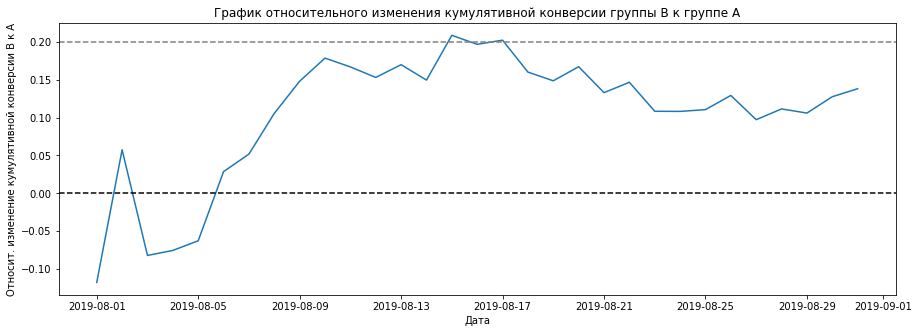

In [51]:
plt.figure(figsize=(15, 5))
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относит. изменение кумулятивной конверсии B к A')
plt.plot(merged_cumulative_conversions['date'],\
        merged_cumulative_conversions['conversionB'] / merged_cumulative_conversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--');

- График относительного изменения кумулятивного среднего чека группы B к группе A так же не показывает стабильный результат в первую очередь из-за наличия выбросов, а после их удаления показывает незначительный, но уже отрицательный результат к данным группы А:

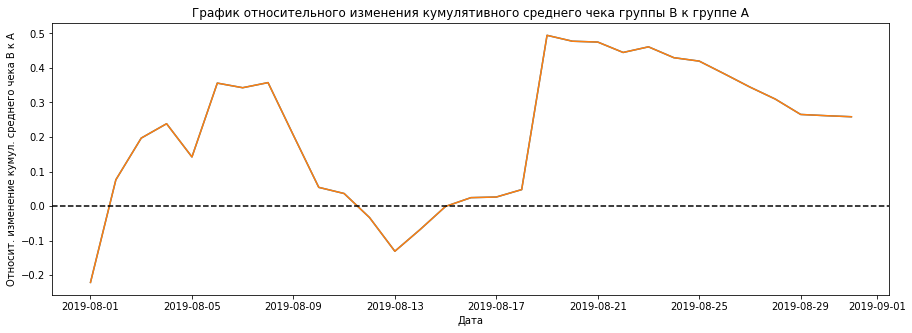

In [52]:
plt.figure(figsize=(15, 5))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относит. изменение кумул. среднего чека B к A')
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['n_ordersB'])/
(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['n_ordersA'])-1)
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['n_ordersB'])/
(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['n_ordersA'])-1)

plt.axhline(y=0, color='black', linestyle='--');

- Учитывая результаты исследования, рекомендуется продолжить тест на 2 недели для получения более определенных данных после стабилизации графика относительного изменения кумулятивного среднего чека группы B к группе А. Наличие статистически значимых различий в конверсии дает шанс обратить эти положительные изменения в увеличение среднего чека в группе B.